In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the dataset

In [ ]:
# Now load the books dataframe
df_books = pd.read_csv('/content/drive/MyDrive/model-save/Books.csv',  on_bad_lines='skip', encoding='latin-1')
df_books.head(8)

<ipython-input-3-4c9f65ba6c64>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('/content/drive/MyDrive/model-save/Books.csv',  on_bad_lines='skip', encoding='latin-1')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...


In [ ]:
# what are the data types of all the columns that are present
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
# Lets remane some wierd columns name
df_books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [ ]:
df_books.head()

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
df_books.iloc[237]['image_url']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [ ]:
# Now load the users dataframe
df_users = pd.read_csv('/content/drive/MyDrive/model-save/Users.csv', on_bad_lines='skip', encoding='latin-1')
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# what are the data types of all the columns that are present
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
# Lets remane some wierd columns name
df_users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [ ]:
df_users.tail()

,user_id,location,age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [ ]:
# Now load the ratings dataframe
df_ratings = pd.read_csv('/content/drive/MyDrive/model-save/Ratings.csv', on_bad_lines='skip', encoding='latin-1')
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# what are the data types of all the columns that are present
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Lets remane some wierd columns name
df_ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [ ]:
df_ratings.tail()

,user_id,ISBN,rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [ ]:
# Shape of the dataframe
print(df_books.shape, df_users.shape, df_ratings.shape, sep='\n')


(271360, 8)
(278858, 3)
(1149780, 3)


In [ ]:
df_ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

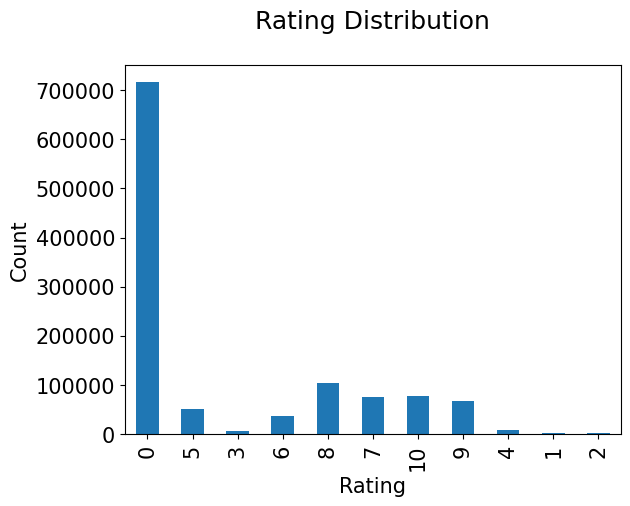

In [ ]:
# Visualize the rating distributions
plt.rc("font", size=15)
df_ratings['rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

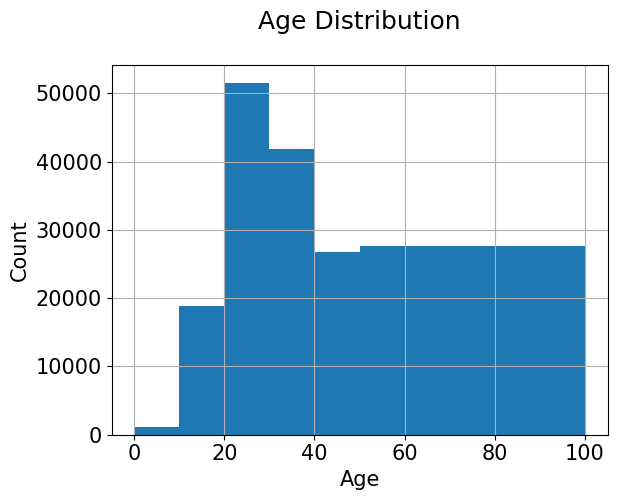

In [ ]:
df_users['age'].hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

#### Check for missing values


In [ ]:
df_books.isnull().sum()

ISBN           0
title          0
author         2
year           0
publisher      2
Image-URL-S    0
Image-URL-M    0
image_url      3
dtype: int64

In [ ]:
df_users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [ ]:
df_ratings.isnull().sum()

user_id    0
ISBN       0
rating     0
dtype: int64

In [ ]:
# Check the duplicates values
print(df_books.duplicated().sum())
print(df_users.duplicated().sum())
print(df_ratings.duplicated().sum())

0
0
0


In [ ]:
# Handling missing values
# replacing the null valuess with null string
df_books['publisher'].fillna('', inplace=True)
df_books['author'].fillna('', inplace=True)
df_books['image_url'].fillna('', inplace=True)

# replacing the null valuess with median value of age
df_users['age'].fillna(df_users['age'].median(), inplace=True)

In [ ]:
print(df_books.isnull().sum())
print('===========')
print(df_users.isnull().sum())
print('===========')
df_ratings.isnull().sum()

ISBN           0
title          0
author         0
year           0
publisher      0
Image-URL-S    0
Image-URL-M    0
image_url      0
dtype: int64
user_id     0
location    0
age         0
dtype: int64


user_id    0
ISBN       0
rating     0
dtype: int64

### Recommendation Based on Rating Counts

In [ ]:
rating_count_df = pd.DataFrame(df_ratings.groupby('ISBN')['rating'].count())
rating_count_df.sort_values('rating', ascending=False).head()


,rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [ ]:
# The book with ISBN “0971880107” received the most rating counts. Let’s find out what book it is, and what books are in the top 5.
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, df_books, on='ISBN')
most_rated_books_summary

,ISBN,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


In [ ]:
# check books with less than 100 ratings
df_books['ISBN'].isin(rating_count_df[rating_count_df < 100].index).sum()

270151

### Popularity Based Recommender System


In [ ]:
ratings_with_books = df_ratings.merge(df_books, on='ISBN')

In [ ]:
num_rating_df = ratings_with_books.groupby('title')['rating'].count().reset_index()
num_rating_df.rename(columns={'rating':'num_of_ratings'},inplace=True)
num_rating_df.head(8)

,title,num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
5,Clifford Visita El Hospital (Clifford El Gran...,1
6,Dark Justice,1
7,Deceived,2


In [ ]:
average_rating_df = pd.DataFrame(ratings_with_books.groupby('title')['rating'].mean()).reset_index()
average_rating_df.rename(columns={'rating':'average_rating'},inplace=True)

In [ ]:
average_rating_df.head(8)

,title,average_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00
5,Clifford Visita El Hospital (Clifford El Gran...,0.00
6,Dark Justice,10.00
7,Deceived,0.00


In [ ]:
popular_df = num_rating_df.merge(average_rating_df, on='title')
popular_df

,title,num_of_ratings,average_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Ã?lpiraten.,2,0.000000
241067,Ã?Ã?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Ã?sterlich leben.,1,7.000000
241069,Ã?Ã?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_of_ratings']>=250].sort_values('average_rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(df_books,on='title').drop_duplicates('title')[['title','author','image_url','num_of_ratings','average_rating']]

In [ ]:
popular_df

,title,author,image_url,num_of_ratings,average_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [ ]:
new_df_merge_rating = df_ratings.merge(df_books, on='ISBN')
new_df_merge_rating

# new_df_merge_rating = ratings_with_books.merge(num_rating_df, on='ISBN')
# new_df_merge_rating

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


### Collaborative filtering based Recommendation System


In [ ]:
# Lets store users who had at least rated more than 200 books
x = df_ratings['user_id'].value_counts() > 200

In [ ]:
x[x].shape

(899,)

In [ ]:
y= x[x].index

In [ ]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [ ]:
ratings = df_ratings[df_ratings['user_id'].isin(y)]

In [ ]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
ratings.shape


(526356, 3)

In [ ]:
final_rating = ratings_with_books.merge(num_rating_df, on='title')


In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url,num_of_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0425150526,0,Death Crosses the Border,Janice Steinberg,1995,Berkley Publishing Group,http://images.amazon.com/images/P/0425150526.0...,http://images.amazon.com/images/P/0425150526.0...,http://images.amazon.com/images/P/0425150526.0...,1
1031132,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993,Ballantine Books,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,http://images.amazon.com/images/P/0449907422.0...,1
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,1
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,1


In [ ]:
final_rating.shape

(1031136, 11)

In [ ]:
# Lets take those books which got at least 50 rating of user
final_rating = final_rating[final_rating['num_of_ratings'] >= 50]

In [ ]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,Image-URL-S,Image-URL-M,image_url,num_of_ratings
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,60
...,...,...,...,...,...,...,...,...,...,...,...
730560,227447,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,68
730561,231210,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,68
730562,238781,0061092096,5,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,68
730563,244349,0061092096,0,Love in Another Town,Barbara Taylor Bradford,1996,HarperTorch,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,http://images.amazon.com/images/P/0061092096.0...,68


In [ ]:
final_rating.shape

(288740, 11)

In [ ]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

<ipython-input-57-a0713a9c36c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_rating.drop_duplicates(['user_id','title'],inplace=True)


### Creating Pivot Table of UsersID vs Books and values are Ratings.



In [ ]:
df_pivot = final_rating.pivot_table(index='title',columns='user_id',values='rating')

In [ ]:
df_pivot.fillna(0,inplace=True)

In [ ]:
df_pivot.shape

(2444, 47994)

In [ ]:
df_pivot

user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using cosine_similarity to calculate the distance of the values of one book with another in a 2-D space (euclidean distance)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(df_pivot)

In [ ]:
similarity_scores.shape

(706, 706)

In [ ]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

### Fecting the Indexes of Books which are at the closest distance to the Book(input)

In [ ]:
def book_recommendation(book_name):
    # index fetch
    index = np.where(df_pivot.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:11]

    data = []
    for i in similar_items:
        item = []
        temp_df = df_books[df_books['title'] == df_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('title')['title'].values))
        item.extend(list(temp_df.drop_duplicates('title')['author'].values))
        item.extend(list(temp_df.drop_duplicates('title')['image_url'].values))

        data.append(item)

    return data

In [ ]:
book_recommendation('1984')


[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.LZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.LZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.LZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.LZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.LZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.LZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.LZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.LZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.LZZZZZZZ.jpg']

## Build the KNN Model

In [ ]:
knn_model = NearestNeighbors(metric='cosine',  algorithm='brute')
knn_model.fit(df_pivot.values)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# Save the model
import joblib
joblib.dump(knn_model, '/content/drive/MyDrive/model-save/knn_model.pkl')

['/content/drive/MyDrive/model-save/knn_model.pkl']

In [ ]:
title = 'The Queen of the Damned (Vampire Chronicles (Paperback))'
df_pivot.loc[title].shape

(810,)

In [ ]:
distance, indice = knn_model.kneighbors([df_pivot.loc[title].values], n_neighbors=6)
print(distance)


[[1.11022302e-16 5.14513364e-01 5.29854435e-01 7.32651399e-01
  7.36497381e-01 7.37146081e-01]]


In [ ]:
print(indice)

[[594 634 624 465 269 640]]


In [ ]:
df_pivot.iloc[indice[0]].index.values

array(['The Queen of the Damned (Vampire Chronicles (Paperback))',
       'The Vampire Lestat (Vampire Chronicles, Book II)',
       'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
       'Taltos: Lives of the Mayfair Witches',
       'Interview with the Vampire',
       'The Witching Hour (Lives of the Mayfair Witches)'], dtype=object)

In [ ]:
check_df = pd.DataFrame({
    'title'   : df_pivot.iloc[indice[0]].index.values,
    'distance': distance[0]
}).sort_values(by='distance', ascending=False)
check_df

,title,distance
5,The Witching Hour (Lives of the Mayfair Witches),7.371461e-01
4,Interview with the Vampire,7.364974e-01
3,Taltos: Lives of the Mayfair Witches,7.326514e-01
2,The Tale of the Body Thief (Vampire Chronicles...,5.298544e-01
1,"The Vampire Lestat (Vampire Chronicles, Book II)",5.145134e-01
0,The Queen of the Damned (Vampire Chronicles (P...,1.110223e-16


## Make recommendation with KNN

In [ ]:
def get_recommends(title = ""):
  try:
    book = df_pivot.loc[title]
  except KeyError as e:
    print('The given book', e, 'does not exist')
    return

  distance, indice = knn_model.kneighbors([book.values], n_neighbors=6)

  recommended_books = pd.DataFrame({
      'title'   : df_pivot.iloc[indice[0]].index.values,
      'distance': distance[0]
    }).sort_values(by='distance', ascending=False).head(5).values

  return [title, recommended_books]

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

["Where the Heart Is (Oprah's Book Club (Paperback))", array([['Deck the Halls (Holiday Classics)', 0.7794012662049634],
       ['Icy Sparks', 0.7581389557327153],
       ['I Know This Much Is True', 0.742740763134136],
       ['The Lovely Bones: A Novel', 0.7258252721924163],
       ['Blue Diary', 0.7066704391186633]], dtype=object)]


In [ ]:
books1 = get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")
print(books1)

['The Queen of the Damned (Vampire Chronicles (Paperback))', array([['The Witching Hour (Lives of the Mayfair Witches)',
        0.7371460814604434],
       ['Interview with the Vampire', 0.7364973810380667],
       ['Taltos: Lives of the Mayfair Witches', 0.7326513985533574],
       ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
        0.5298544346433054],
       ['The Vampire Lestat (Vampire Chronicles, Book II)',
        0.5145133637013516]], dtype=object)]


In [ ]:
books2 = get_recommends("Harry Potter and the Chamber of Secrets (Book 2)")
print(books2)

['Harry Potter and the Chamber of Secrets (Book 2)', array([['Harry Potter and the Order of the Phoenix (Book 5)',
        0.6444421242495589],
       ["Harry Potter and the Sorcerer's Stone (Book 1)",
        0.5525138623423405],
       ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
        0.5201091291778858],
       ['Harry Potter and the Goblet of Fire (Book 4)',
        0.42935988569046857],
       ['Harry Potter and the Prisoner of Azkaban (Book 3)',
        0.3910491964019145]], dtype=object)]
